# Projet Breast Cancer

## Import des librairies

In [1]:
#base
import numpy as np
import pandas as pd

#viz
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from pandas_profiling import ProfileReport

#data
from sklearn import datasets 

#preprocessing & modelisation
from sklearn.model_selection import *
from sklearn.preprocessing import *

#modelisation
from lazypredict.Supervised import LazyClassifier
from pycaret.classification import *

#evaluation
from sklearn.metrics import *

C:\Users\Ambre.PRIVAT\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [41]:
from sklearn.svm import LinearSVC

## Import des données

In [2]:
data = datasets.load_breast_cancer()
print(dir(data))
print("")
print(data.DESCR)

['DESCR', 'data', 'feature_names', 'filename', 'frame', 'target', 'target_names']

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed fo

In [3]:
dataset, dataset["cancer_status"] = pd.DataFrame(columns=data["feature_names"], data=data.data), data.target 
dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,cancer_status
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,1.09,0.91,8.59,153.40,0.01,0.05,0.05,0.02,0.03,0.01,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12,0
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,0.54,0.73,3.40,74.08,0.01,0.01,0.02,0.01,0.01,0.00,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09,0
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,0.75,0.79,4.58,94.03,0.01,0.04,0.04,0.02,0.02,0.00,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09,0
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,0.50,1.16,3.44,27.23,0.01,0.07,0.06,0.02,0.06,0.01,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17,0
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,0.76,0.78,5.44,94.44,0.01,0.02,0.06,0.02,0.02,0.01,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08,0


In [4]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

cancer_status:
- 0 = bénin
- 1 = malin

## Analyse

In [ ]:
profile_immo = ProfileReport(dataset)
profile_immo.to_file(output_file ="rapport.html")

## Pre-processing & modelisation

### Données non modifiées

#### 1. Test avec PyCaret

In [5]:
exp_clf = setup(data = dataset, target = 'cancer_status', session_id=123)

,Description,Value
0,session_id,123
1,Target,cancer_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [6]:
dataset.cancer_status.value_counts()

1    357
0    212
Name: cancer_status, dtype: int64

In [7]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.9722,0.9906,0.9883,0.9697,0.9786,0.9392,0.9407,0.0740
lightgbm,Light Gradient Boosting Machine,0.9697,0.9944,0.9845,0.9695,0.9765,0.9339,0.9356,0.0400
ada,Ada Boost Classifier,0.9646,0.9922,0.9922,0.9555,0.9731,0.9214,0.9242,0.0410
et,Extra Trees Classifier,0.9622,0.9930,0.9885,0.9558,0.9713,0.9160,0.9196,0.0660
rf,Random Forest Classifier,0.9547,0.9897,0.9766,0.9544,0.9650,0.9007,0.9026,0.0790
qda,Quadratic Discriminant Analysis,0.9547,0.9911,0.9648,0.9661,0.9648,0.9013,0.9036,0.0090
ridge,Ridge Classifier,0.9495,0.0000,0.9922,0.9355,0.9622,0.8864,0.8933,0.0100
lr,Logistic Regression,0.9470,0.9889,0.9685,0.9511,0.9593,0.8831,0.8848,0.6580
lda,Linear Discriminant Analysis,0.9446,0.9887,0.9923,0.9291,0.9588,0.8744,0.8824,0.0080
nb,Naive Bayes,0.9421,0.9852,0.9765,0.9364,0.9557,0.8720,0.8749,0.0070


#### Test avec lazypredict

In [8]:
X = dataset.iloc[:, 0:-1]
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.00,0.12,0.28,0.30,0.15,0.24,0.08,...,25.38,17.33,184.60,2019.00,0.16,0.67,0.71,0.27,0.46,0.12
1,20.57,17.77,132.90,1326.00,0.08,0.08,0.09,0.07,0.18,0.06,...,24.99,23.41,158.80,1956.00,0.12,0.19,0.24,0.19,0.28,0.09
2,19.69,21.25,130.00,1203.00,0.11,0.16,0.20,0.13,0.21,0.06,...,23.57,25.53,152.50,1709.00,0.14,0.42,0.45,0.24,0.36,0.09
3,11.42,20.38,77.58,386.10,0.14,0.28,0.24,0.11,0.26,0.10,...,14.91,26.50,98.87,567.70,0.21,0.87,0.69,0.26,0.66,0.17
4,20.29,14.34,135.10,1297.00,0.10,0.13,0.20,0.10,0.18,0.06,...,22.54,16.67,152.20,1575.00,0.14,0.20,0.40,0.16,0.24,0.08


In [9]:
#récupération de la target
y = dataset["cancer_status"]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: cancer_status, dtype: int32

In [10]:
#split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

#test de différents modèles pour trouver le plus adapté
reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
#fit sur les données
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

#affichage des résultats
print(models)

 31%|█████████████████████████▊                                                         | 9/29 [00:00<00:00, 23.80it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.59it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.99               0.99     0.99      0.99   
ExtraTreesClassifier               0.99               0.99     0.99      0.99   
SGDClassifier                      0.99               0.99     0.99      0.99   
RandomForestClassifier             0.99               0.99     0.99      0.99   
QuadraticDiscriminantAnalysis      0.99               0.99     0.99      0.99   
Perceptron                         0.99               0.99     0.99      0.99   
LogisticRegression                 0.99               0.99     0.99      0.99   
LGBMClassifier                     0.98               0.98     0.98      0.98   
PassiveAggressiveClassifier        0.98               0.98     0.98      0.98   
KN

### Données modifiées
#### Test avec PyCaret

In [11]:
exp_clf_tuned = setup(data = dataset, target = 'cancer_status', session_id=123,
                      normalize = True, transformation = True)

,Description,Value
0,session_id,123
1,Target,cancer_status
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(569, 31)"
5,Missing Values,False
6,Numeric Features,30
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [12]:
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.9799,0.9916,0.9923,0.9778,0.9846,0.9555,0.9572,0.0660
lightgbm,Light Gradient Boosting Machine,0.9722,0.9930,0.9883,0.9695,0.9786,0.9392,0.9404,0.0390
gbc,Gradient Boosting Classifier,0.9646,0.9884,0.9843,0.9619,0.9726,0.9226,0.9246,0.0710
lr,Logistic Regression,0.9622,0.9956,0.9763,0.9664,0.9706,0.9175,0.9202,0.6310
ada,Ada Boost Classifier,0.9622,0.9925,0.9802,0.9622,0.9706,0.9174,0.9194,0.0400
ridge,Ridge Classifier,0.9572,0.0000,0.9885,0.9484,0.9675,0.9049,0.9087,0.0110
svm,SVM - Linear Kernel,0.9546,0.0000,0.9682,0.9630,0.9646,0.9007,0.9042,0.0150
lda,Linear Discriminant Analysis,0.9522,0.9868,0.9846,0.9442,0.9636,0.8941,0.8973,0.0080
knn,K Neighbors Classifier,0.9472,0.9906,0.9806,0.9408,0.9596,0.8833,0.8876,0.0120
rf,Random Forest Classifier,0.9472,0.9866,0.9689,0.9516,0.9590,0.8846,0.8894,0.0920


#### Test avec lazyclassifier

In [67]:
exp_clf_tuned

('cancer_status',
 [LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                     intercept_scaling=1, l1_ratio=None, max_iter=1000,
                     multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                       metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
                       weights='uniform'),
  GaussianNB(priors=None, var_smoothing=1e-09),
  DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=None, max_features=None, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=1, min_samples_split=2,
                         min_weight_fraction_leaf=0.0, presort='deprecated',
                         ra

In [39]:
# Fonction permettant de trouver l'index d'un élément string dans le tuple précédent

import sys
from collections import Sequence,defaultdict

#making code python3-compatible
if sys.version_info[0] == 3:
    basestring = str

def buildLocator(tree):
    locator = defaultdict(list)
    def fillLocator(tree, locator,location):
        for index,item in enumerate(tree):            
            if isinstance(item,basestring):
                locator[item].append(location+(index,))
            elif isinstance(item,Sequence):
                fillLocator(item,locator, location+(index,))
    fillLocator(tree,locator,())
    return locator

locator = buildLocator(exp_clf_tuned)

print("Index des valeurs voulues (ajouter +1 au dernier indice) :")
print("- X_train:", locator["X_training Set"])
print("- Y_train:", locator["y_training Set"])
print("- X_test :", locator["X_test Set"])
print("- Y_test :", locator["y_test Set"])

Index des valeurs voulues (ajouter +1 au dernier indice) :
- X_train: [(27, 1, 0)]
- X_test : [(27, 3, 0)]
- Y_train: [(27, 2, 0)]
- Y_test : [(27, 4, 0)]


In [26]:
X_train = exp_clf_tuned[27][1][1]
X_train.head()

,mean texture,mean perimeter,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,fractal dimension error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
559,1.04,-0.72,-0.17,0.22,0.65,0.07,-1.71,0.61,-0.75,2.17,...,0.79,-0.84,1.66,-0.78,0.04,0.29,0.70,-0.14,-1.56,0.50
295,-1.58,0.02,-0.22,-0.90,-1.39,-0.86,-0.75,-0.41,-0.93,-1.18,...,-1.23,-0.14,-1.58,-0.22,-0.59,-1.20,-1.46,-0.89,0.10,-1.05
264,0.69,0.92,0.18,-0.07,0.39,0.73,0.32,-1.12,0.46,-1.05,...,-1.48,1.17,0.67,1.10,1.11,0.32,0.81,1.26,0.72,-0.32
125,-0.42,0.04,-0.55,-0.93,-1.28,-1.27,-0.66,-0.45,-0.93,-0.70,...,-1.33,0.09,-0.25,0.03,-0.66,-0.85,-1.07,-1.03,-0.90,-0.66
280,1.49,1.34,0.51,0.96,1.33,1.27,0.43,0.13,1.15,-0.31,...,0.16,1.43,1.51,1.44,1.91,1.05,1.41,1.13,0.78,0.98


In [27]:
# vérification transformation X_train par rapport aux données de base
dataset.iloc[:, 0:-1].iloc[X_train.index].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
559,11.51,23.93,74.52,403.50,0.09,0.10,0.11,0.04,0.14,0.07,...,12.48,37.16,82.28,474.20,0.13,0.25,0.36,0.10,0.21,0.09
295,13.77,13.27,88.06,582.70,0.09,0.06,0.01,0.02,0.16,0.06,...,14.67,16.93,94.17,661.10,0.12,0.11,0.04,0.06,0.28,0.07
264,17.19,22.07,111.60,928.30,0.10,0.09,0.09,0.07,0.19,0.06,...,21.58,29.33,140.50,1436.00,0.16,0.26,0.39,0.20,0.32,0.08
125,13.85,17.21,88.44,588.70,0.09,0.06,0.01,0.01,0.16,0.06,...,15.49,23.58,100.30,725.90,0.12,0.14,0.08,0.05,0.24,0.07
280,19.16,26.60,126.20,1138.00,0.10,0.15,0.19,0.10,0.19,0.06,...,23.72,35.90,159.80,1724.00,0.18,0.38,0.58,0.19,0.33,0.10


In [34]:
Y_train = exp_clf_tuned[27][2][1]
print(len(X_test)/len(dataset))
Y_train.head()

0.6994727592267135


559    1
295    1
264    0
125    1
280    0
Name: cancer_status, dtype: int32

In [35]:
X_test = exp_clf_tuned[27][3][1]
X_test.head()

,mean texture,mean perimeter,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,...,fractal dimension error,worst radius,worst texture,worst perimeter,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
333,-1.11,-0.92,-0.96,-1.54,-1.69,-1.76,-0.01,-0.10,-0.97,-0.32,...,-0.99,-0.74,-0.53,-0.79,-0.61,-1.32,-1.77,-1.80,0.08,-0.45
273,-0.85,-1.58,-0.34,-1.46,-1.38,-1.13,0.97,0.27,-0.50,0.54,...,0.60,-1.51,-0.76,-1.57,0.76,-1.38,-1.43,-1.02,0.13,0.15
201,0.11,1.03,-0.40,0.57,0.56,0.92,-1.14,-1.33,0.35,-0.78,...,-0.41,1.01,0.14,1.08,0.41,0.85,0.65,1.21,0.28,-0.07
178,0.72,-0.29,-2.90,-2.61,-1.67,-1.83,-1.68,-1.98,-1.38,0.03,...,-2.23,-0.34,0.62,-0.49,-2.66,-2.23,-1.75,-1.98,-1.08,-2.13
85,-0.08,1.20,0.29,0.29,0.88,1.14,1.11,-0.20,1.29,0.65,...,0.35,1.34,0.43,1.32,0.48,-0.07,0.50,0.85,1.31,0.41


In [36]:
#pour vérification X_test
dataset.iloc[:, 0:-1].iloc[X_test.index].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
333,11.25,14.78,71.38,390.00,0.08,0.04,0.00,0.00,0.18,0.06,...,12.76,22.06,82.08,492.70,0.12,0.10,0.01,0.02,0.28,0.07
273,9.74,15.67,61.50,289.90,0.09,0.05,0.01,0.01,0.21,0.06,...,10.75,20.88,68.09,355.20,0.15,0.09,0.04,0.05,0.28,0.08
201,17.54,19.32,115.10,951.60,0.09,0.12,0.10,0.07,0.15,0.05,...,20.42,25.84,139.50,1239.00,0.14,0.34,0.35,0.19,0.29,0.08
178,13.01,22.22,82.01,526.40,0.06,0.02,0.00,0.00,0.14,0.05,...,14.00,29.02,88.18,608.80,0.08,0.03,0.01,0.01,0.23,0.06
85,18.46,18.52,121.10,1075.00,0.10,0.11,0.13,0.09,0.21,0.06,...,22.93,27.68,152.20,1603.00,0.14,0.21,0.32,0.16,0.37,0.09


In [37]:
Y_test = exp_clf_tuned[27][4][1]
print(len(Y_test)/len(dataset))
Y_test.head()

0.30052724077328646


333    1
273    1
201    0
178    1
85     0
Name: cancer_status, dtype: int32

In [38]:
#test de différents modèles pour trouver le plus adapté
reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
#fit sur les données
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

#affichage des résultats
print(models)

 31%|█████████████████████████▊                                                         | 9/29 [00:00<00:00, 23.54it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:01<00:00, 26.23it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'
                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
LinearSVC                          0.99               0.99     0.99      0.99   
LinearDiscriminantAnalysis         0.99               0.99     0.99      0.99   
CalibratedClassifierCV             0.99               0.99     0.99      0.99   
RidgeClassifierCV                  0.99               0.99     0.99      0.99   
RidgeClassifier                    0.99               0.99     0.99      0.99   
SGDClassifier                      0.99               0.99     0.99      0.99   
SVC                                0.99               0.99     0.99      0.99   
PassiveAggressiveClassifier        0.98               0.98     0.98      0.98   
LogisticRegression                 0.98               0.98     0.98      0.98   
Pe

### Learning Curve

##### LinearSVC(penalty='l2', loss='squared_hinge', *, dual=True, tol=0.0001, C=1.0, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=None, max_iter=1000)


- penalty | {‘l1’, ‘l2’}, default=’l2’
<br>Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

- loss | {‘hinge’, ‘squared_hinge’}, default=’squared_hinge’
<br>Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss. The combination of penalty='l1' and loss='hinge' is not supported.

- dual | bool, default=True
<br>Select the algorithm to either solve the dual or primal optimization problem. Prefer dual=False when n_samples > n_features.

- tol | float, default=1e-4
<br>Tolerance for stopping criteria.

- C | float, default=1.0
<br>Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive.

- multi_class | {‘ovr’, ‘crammer_singer’}, default=’ovr’
<br>Determines the multi-class strategy if y contains more than two classes. "ovr" trains n_classes one-vs-rest classifiers, while "crammer_singer" optimizes a joint objective over all classes. While crammer_singer is interesting from a theoretical perspective as it is consistent, it is seldom used in practice as it rarely leads to better accuracy and is more expensive to compute. If "crammer_singer" is chosen, the options loss, penalty and dual will be ignored.

- fit_intercept | bool, default=True
<br>Whether to calculate the intercept for this model. If set to false, no intercept will be used in calculations (i.e. data is expected to be already centered).

- intercept_scaling | float, default=1
<br>When self.fit_intercept is True, instance vector x becomes [x, self.intercept_scaling], i.e. a “synthetic” feature with constant value equals to intercept_scaling is appended to the instance vector. The intercept becomes intercept_scaling * synthetic feature weight Note! the synthetic feature weight is subject to l1/l2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) intercept_scaling has to be increased.

- class_weight | dict or ‘balanced’, default=None
<br>Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y)).

- verbose | int, default=0
<br>Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in liblinear that, if enabled, may not work properly in a multithreaded context.

- random_state | int, RandomState instance or None, default=None
<br>Controls the pseudo random number generation for shuffling the data for the dual coordinate descent (if dual=True). When dual=False the underlying implementation of LinearSVC is not random and random_state has no effect on the results. Pass an int for reproducible output across multiple function calls. See Glossary.

- max_iter | int, default=1000
<br>The maximum number of iterations to be run.

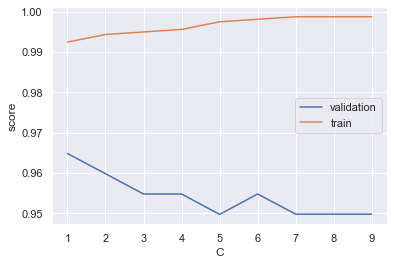

In [64]:
C_list = list(range(1, 10, 1))

for k in C_list:
    train_scores, test_scores = validation_curve(LinearSVC(C=k), 
                                                 X_train, Y_train,
                                                 param_name="C",
                                                 scoring="accuracy",                                          
                                                 param_range=C_list,
                                                 cv=5)

plt.plot(C_list, test_scores.mean(axis=1), label = 'validation')
plt.plot(C_list, train_scores.mean(axis=1), label = 'train')

plt.ylabel('score')
plt.xlabel('C')
plt.legend();

C=1 (par défaut)

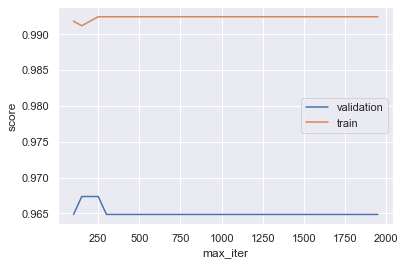

In [63]:
max_iter_list = list(range(100, 2000, 50))

for k in max_iter_list:
    train_scores, test_scores = validation_curve(LinearSVC(max_iter=k), 
                                                 X_train, Y_train,
                                                 param_name="max_iter",
                                                 scoring="accuracy",                                          
                                                 param_range=max_iter_list,
                                                 cv=5)

plt.plot(max_iter_list, test_scores.mean(axis=1), label = 'validation')
plt.plot(max_iter_list, train_scores.mean(axis=1), label = 'train')

plt.ylabel('score')
plt.xlabel('max_iter')
plt.legend();

max_iter = 200 (1000 par défaut)

Train - Accuracy :
 0.992462311557789
Train - Classification report :
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       144
           1       0.99      1.00      0.99       254

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398

Train - Confusion matrix :



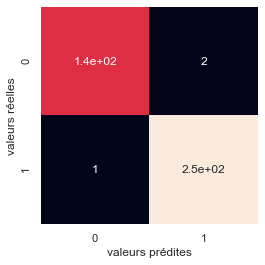

Test - Accuracy :
 0.9941520467836257
Test - Classification report :
               precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      1.00       103

    accuracy                           0.99       171
   macro avg       1.00      0.99      0.99       171
weighted avg       0.99      0.99      0.99       171

Test - Confusion matrix :



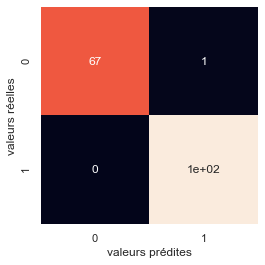

In [70]:
clf = LinearSVC(max_iter=200)
clf.fit(X_train, Y_train)
result_clf = clf.predict(X_test)

print("Train - Accuracy :\n", accuracy_score(Y_train, clf.predict(X_train)))
print("Train - Classification report :\n",classification_report(Y_train, clf.predict(X_train)))
print("Train - Confusion matrix :\n")
sns.heatmap(confusion_matrix(Y_train, clf.predict(X_train)), square=True, annot=True, cbar=False)
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')
plt.show()

print("Test - Accuracy :\n", accuracy_score(Y_test, result_clf))
print("Test - Classification report :\n", classification_report(Y_test, result_clf))
print("Test - Confusion matrix :\n")
sns.heatmap(confusion_matrix(Y_test, result_clf), square=True, annot=True, cbar=False)
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles');

## Deep Learning - Tests

softmax

In [72]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [99]:
#Neural Networks

num_epoch = 50

# 1-layer NN
def l1neuralNetwork(X_train, Y_train):
    model = Sequential()
    model.add(Dense(input_dim=27, units=2))
    model.add(Activation('softmax')) #on aurait pu choisir sigmoid, mais on a décidé de tester softmax
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

# 3-layer NN
def l3neuralNetwork(X_train, Y_train):
    model = Sequential()
    model.add(Dense(input_dim=27, units=27))
    model.add(Dense(input_dim=27, units=27))
    model.add(Dense(input_dim=27, units=2))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

# 5-layer NN
def l5neuralNetwork(X_train, Y_train):
    model = Sequential()
    model.add(Dense(input_dim=27, units=27))
    model.add(Dense(input_dim=27, units=27))
    model.add(Dense(input_dim=27, units=27))
    model.add(Dense(input_dim=27, units=27))
    model.add(Dense(input_dim=27, units=2))
    model.add(Activation('softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])
    return model

In [100]:
model1 = l1neuralNetwork(X_train, X_test)
model1.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 2)                 56        
_________________________________________________________________
activation_9 (Activation)    (None, 2)                 0         
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________


In [96]:
model2 = l3neuralNetwork(X_train, X_test)
model2.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 27)                756       
_________________________________________________________________
dense_19 (Dense)             (None, 27)                756       
_________________________________________________________________
dense_20 (Dense)             (None, 2)                 56        
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
Total params: 1,568
Trainable params: 1,568
Non-trainable params: 0
_________________________________________________________________


In [101]:
model3 = l5neuralNetwork(X_train, X_test)
model3.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 27)                756       
_________________________________________________________________
dense_23 (Dense)             (None, 27)                756       
_________________________________________________________________
dense_24 (Dense)             (None, 27)                756       
_________________________________________________________________
dense_25 (Dense)             (None, 27)                756       
_________________________________________________________________
dense_26 (Dense)             (None, 2)                 56        
_________________________________________________________________
activation_10 (Activation)   (None, 2)                 0         
Total params: 3,080
Trainable params: 3,080
Non-trainable params: 0
___________________________________________________

In [116]:
history1 = model1.fit(X_train, Y_train, epochs=num_epoch,shuffle=True,validation_data=(X_test, Y_test))
y_pred1 = model1.predict_classes(X_test)

Epoch 1/50
13/13 [==============================] - 0s 13ms/step - loss: 0.1120 - accuracy: 0.9648 - val_loss: 0.0958 - val_accuracy: 0.9766
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1111 - accuracy: 0.9648 - val_loss: 0.0953 - val_accuracy: 0.9766
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1101 - accuracy: 0.9648 - val_loss: 0.0948 - val_accuracy: 0.9766
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1092 - accuracy: 0.9648 - val_loss: 0.0942 - val_accuracy: 0.9766
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1084 - accuracy: 0.9648 - val_loss: 0.0936 - val_accuracy: 0.9766
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1076 - accuracy: 0.9648 - val_loss: 0.0930 - val_accuracy: 0.9825
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.1067 - accuracy: 0.9648 - val_loss: 0.0925 - val_accuracy: 0.9825
Epoch 8/50
13/13 [=

In [117]:
history2 = model2.fit(X_train, Y_train, epochs=num_epoch,shuffle=True,validation_data=(X_test, Y_test))
y_pred2 = model2.predict_classes(X_test)

Epoch 1/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0670 - accuracy: 0.9648 - val_loss: 0.0868 - val_accuracy: 0.9708
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0667 - accuracy: 0.9673 - val_loss: 0.0867 - val_accuracy: 0.9708
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0664 - accuracy: 0.9648 - val_loss: 0.0864 - val_accuracy: 0.9708
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9648 - val_loss: 0.0862 - val_accuracy: 0.9708
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0659 - accuracy: 0.9648 - val_loss: 0.0859 - val_accuracy: 0.9708
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0653 - accuracy: 0.9673 - val_loss: 0.0862 - val_accuracy: 0.9708
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.0651 - accuracy: 0.9673 - val_loss: 0.0858 - val_accuracy: 0.9708
Epoch 8/50
13/13 [==

In [118]:
history3 = model3.fit(X_train, Y_train, epochs=num_epoch,shuffle=True,validation_data=(X_test, Y_test))
y_pred3 = model3.predict_classes(X_test)

Epoch 1/50
13/13 [==============================] - 0s 9ms/step - loss: 0.0586 - accuracy: 0.9698 - val_loss: 0.0763 - val_accuracy: 0.9708
Epoch 2/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0584 - accuracy: 0.9698 - val_loss: 0.0758 - val_accuracy: 0.9708
Epoch 3/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0587 - accuracy: 0.9724 - val_loss: 0.0761 - val_accuracy: 0.9708
Epoch 4/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0584 - accuracy: 0.9724 - val_loss: 0.0760 - val_accuracy: 0.9708
Epoch 5/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 0.9698 - val_loss: 0.0756 - val_accuracy: 0.9708
Epoch 6/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0575 - accuracy: 0.9749 - val_loss: 0.0751 - val_accuracy: 0.9708
Epoch 7/50
13/13 [==============================] - 0s 5ms/step - loss: 0.0573 - accuracy: 0.9698 - val_loss: 0.0748 - val_accuracy: 0.9708
Epoch 8/50
13/13 [==

#### Evaluation

In [111]:
train_score = model1.evaluate(X_train, Y_train, verbose=0)
valid_score = model1.evaluate(X_test, Y_test, verbose=0)

print('Train acc: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val acc: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train acc:  0.9648 , Train Loss:  0.1123
Val acc:  0.9766 , Val Loss:  0.0965


In [112]:
train_score = model2.evaluate(X_train, Y_train, verbose=0)
valid_score = model2.evaluate(X_test, Y_test, verbose=0)

print('Train acc: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val acc: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train acc:  0.9673 , Train Loss:  0.0661
Val acc:  0.9708 , Val Loss:  0.0868


In [113]:
train_score = model3.evaluate(X_train, Y_train, verbose=0)
valid_score = model3.evaluate(X_test, Y_test, verbose=0)

print('Train acc: ', round(train_score[1], 4), ', Train Loss: ', round(train_score[0], 4)) 
print('Val acc: ', round(valid_score[1], 4), ', Val Loss: ', round(valid_score[0], 4))

Train acc:  0.9724 , Train Loss:  0.057
Val acc:  0.9708 , Val Loss:  0.0757


En termes de performances pures, le meilleur NN est le model3

Learning Curve pour le model1


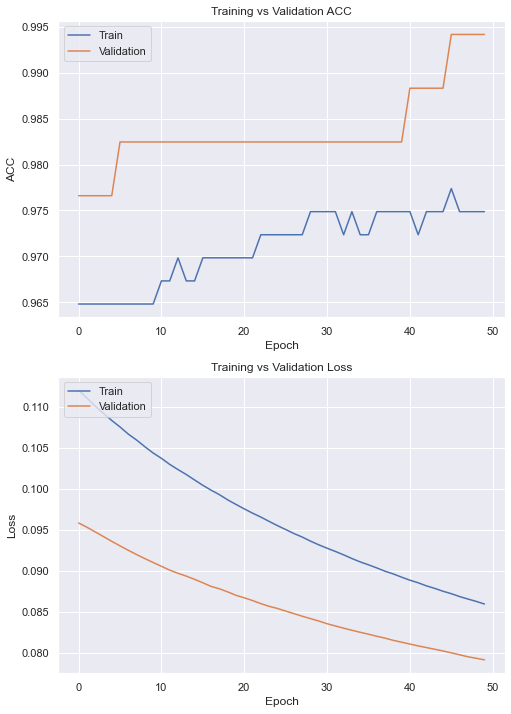

In [121]:
# plot des metrics pour constater l'overfitting

def plot_hist(h, xsize=6, ysize=10):
    # Prepare plotting
    fig_size = plt.rcParams["figure.figsize"]
    plt.rcParams["figure.figsize"] = [xsize, ysize]
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=True)
    
    # summarize history for ACC
    plt.subplot(211)
    plt.plot(h['accuracy'])
    plt.plot(h['val_accuracy'])
    plt.title('Training vs Validation ACC')
    plt.ylabel('ACC')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    print
    # summarize history for loss
    plt.subplot(212)
    plt.plot(h['loss'])
    plt.plot(h['val_loss'])
    plt.title('Training vs Validation Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')
    
    # Plot it all in IPython (non-interactive)
    plt.draw()
    plt.show()

    return
print("Learning Curve pour le model1")
plot_hist(history1.history, xsize=8, ysize=12)

In [159]:
hist1 = pd.DataFrame(data=[history1.history['accuracy'],
                      history1.history['val_accuracy'],
                      history1.history['loss'],
                      history1.history['val_loss']
                     ]).T

hist1.columns = ["accuracy", "val_accuracy", "loss", "val_loss"]

print("différence max d'accuracy pour le modèle 1 :",(hist1["accuracy"]-hist1["val_accuracy"]).max())
print("différence min d'accuracy pour le modèle 1 :",(hist1["accuracy"]-hist1["val_accuracy"]).min())

différence max d'accuracy pour le modèle 1 : -0.007581770420074463
différence min d'accuracy pour le modèle 1 : -0.01927769184112549


Learning Curve pour le model2


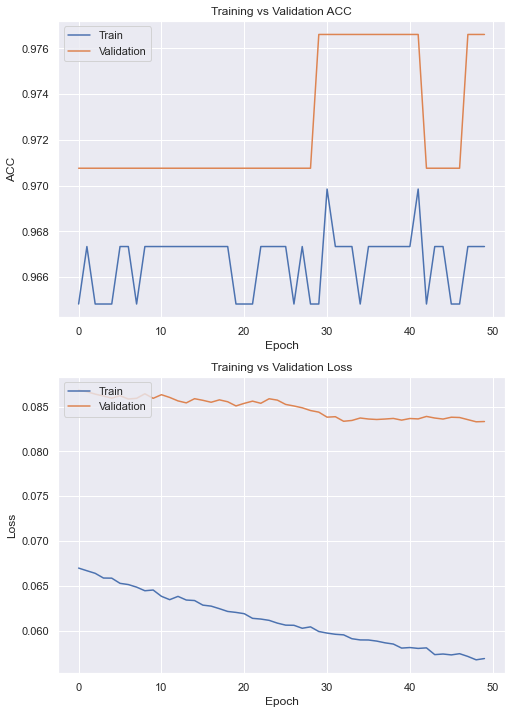

In [122]:
print("Learning Curve pour le model2")
plot_hist(history2.history, xsize=8, ysize=12)

In [162]:
hist2 = pd.DataFrame(data=[history2.history['accuracy'],
                      history2.history['val_accuracy'],
                      history2.history['loss'],
                      history2.history['val_loss']
                     ]).T

hist2.columns = ["accuracy", "val_accuracy", "loss", "val_loss"]

print("différence max d'accuracy pour le modèle 2 :",(hist2["accuracy"]-hist2["val_accuracy"]).max())
print("différence min d'accuracy pour le modèle 2 :",(hist2["accuracy"]-hist2["val_accuracy"]).min())

différence max d'accuracy pour le modèle 2 : -0.0034235715866088867
différence min d'accuracy pour le modèle 2 : -0.011784076690673828


Learning Curve pour le model3


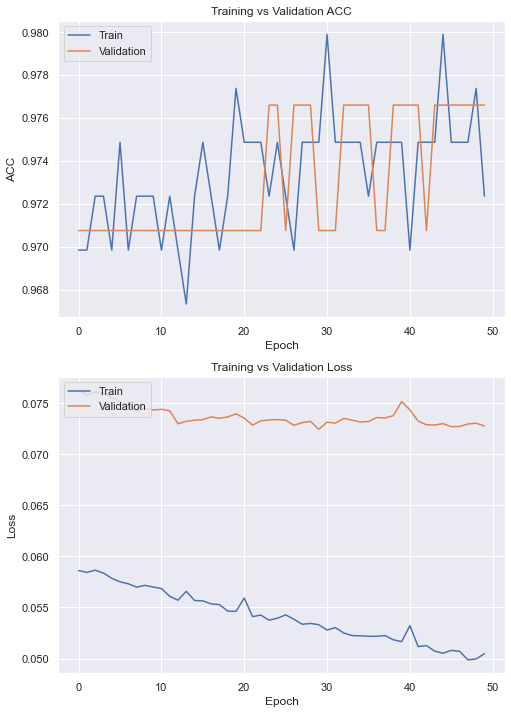

In [123]:
print("Learning Curve pour le model3")
plot_hist(history3.history, xsize=8, ysize=12)

In [161]:
hist3 = pd.DataFrame(data=[history3.history['accuracy'],
                      history3.history['val_accuracy'],
                      history3.history['loss'],
                      history3.history['val_loss']
                     ]).T

hist3.columns = ["accuracy", "val_accuracy", "loss", "val_loss"]

print("différence max d'accuracy pour le modèle 1 :",(hist3["accuracy"]-hist3["val_accuracy"]).max())
print("différence min d'accuracy pour le modèle 1 :",(hist3["accuracy"]-hist3["val_accuracy"]).min())

différence max d'accuracy pour le modèle 1 : 0.009139299392700195
différence min d'accuracy pour le modèle 1 : -0.006758987903594971


Ce dernier modèle est le meilleur, tout en étant underfit.
<br>Les deux premiers sont également underfit